In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Common_Functions as cmn

In [2]:
df = pd.read_csv(cmn.PATH_df_no_NAN_99p).drop(columns="Unnamed: 0")

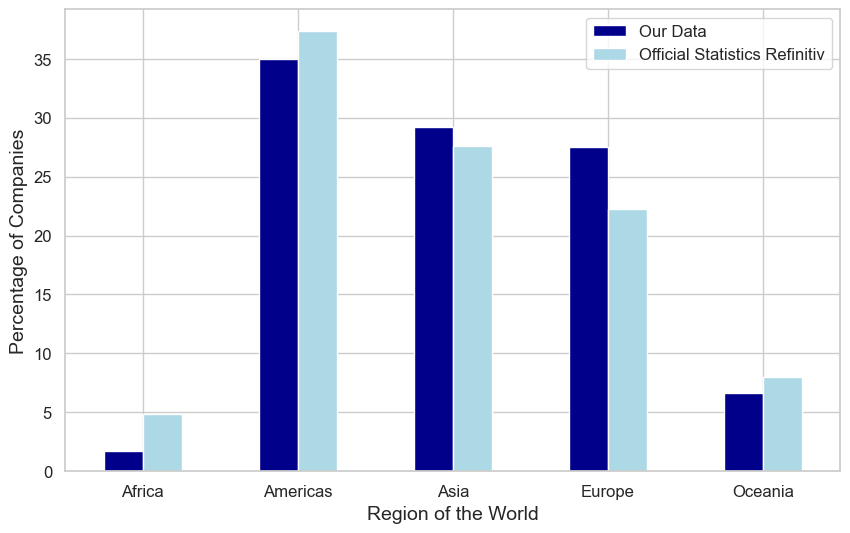

In [3]:
df_reg = df.drop_duplicates(subset='ISIN').reset_index().drop(columns=["index"])
df_reg = df.groupby("Region of Headquarters").size().reset_index(name="Num Companies")

df_reg_ref = pd.DataFrame({"Region of Headquarters": ["Africa", "Americas", "Asia", "Europe", "Oceania"],
                           "Num Companies Ref": [550, 4200, 3100, 2500, 900]})

df_comb = pd.merge(df_reg, df_reg_ref, on="Region of Headquarters", how="left")

# Calculate percentages
df_comb['Our Data'] = df_comb['Num Companies'] / df_comb['Num Companies'].sum() * 100
df_comb['Official Statistics Refinitiv'] = df_comb['Num Companies Ref'] / df_comb['Num Companies Ref'].sum() * 100

# Create plot
sns.set(style="whitegrid")
ax = df_comb.plot(kind="bar", x="Region of Headquarters", y=["Our Data", "Official Statistics Refinitiv"],
                      figsize=(10, 6), rot=0, fontsize=12, color=['darkblue', 'lightblue'])
ax.set_xlabel("Region of the World", fontsize=14)
ax.set_ylabel("Percentage of Companies", fontsize=14)
ax.legend(loc='best', fontsize=12)
plt.show()

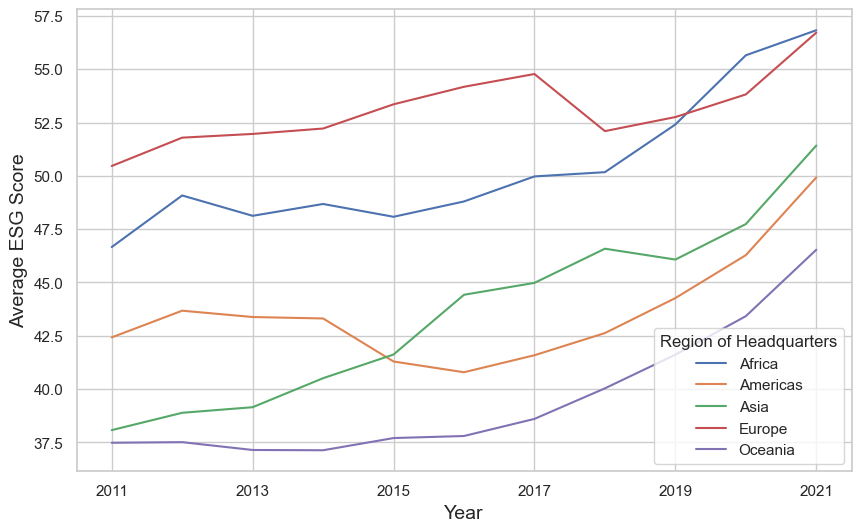

In [4]:
df_ESG = df.groupby(['Year', 'Region of Headquarters']
                    ).mean().reset_index().iloc[41:96]

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ESG, x="Year", y="ESG Score", hue="Region of Headquarters")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average ESG Score", fontsize=14)
plt.xticks(np.arange(2011, 2022, 2))
plt.show()

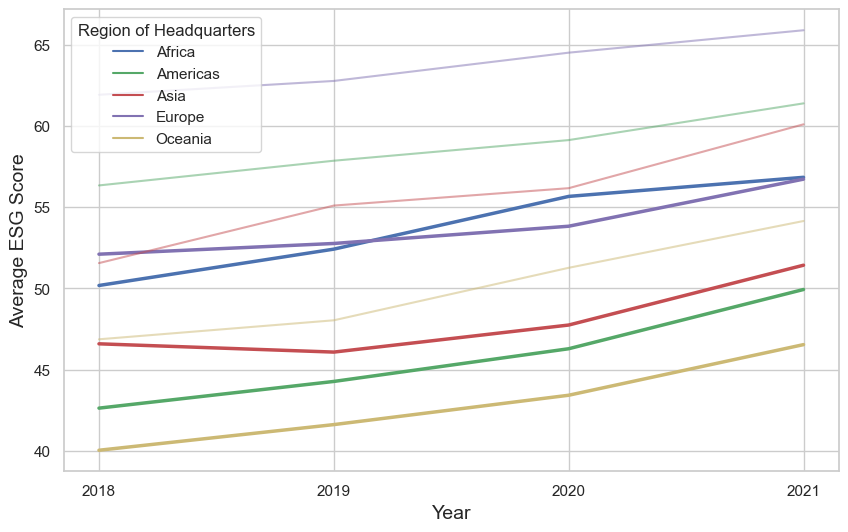

In [5]:
df_ESG = df.groupby(['Year', 'Region of Headquarters']).mean().reset_index().iloc[76:96]

# Reference from Refinitiv
years = [2018, 2019, 2020, 2021]
regions = ["Americas", "Asia", "Europe", "Oceania"]
scores = [
    [56.33, 57.85, 59.12, 61.38],
    [51.55, 55.09, 56.16, 60.09],
    [61.91, 62.76, 64.5, 65.88],
    [46.86, 48.03, 51.26, 54.14]
]

df_list = [pd.DataFrame({
                "Year": years,
                "Region": region,
                "Average ESG Score": score})
            for region, score in zip(regions, scores)]

df_ESG_ref = pd.concat(df_list, ignore_index=True)

# Define custom color palette using colors from first plot
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b2", "#ccb974"]
light_colors = [(c[0], c[1], c[2], 0.5) for c in sns.color_palette(colors)[1:]]

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ESG, x="Year", y="ESG Score", hue="Region of Headquarters", palette=colors, linewidth=2.5)
sns.lineplot(data=df_ESG_ref, x="Year", y="Average ESG Score", hue="Region", palette=light_colors, legend=False)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average ESG Score", fontsize=14)
plt.xticks(np.arange(2018, 2022, 1))
plt.show()

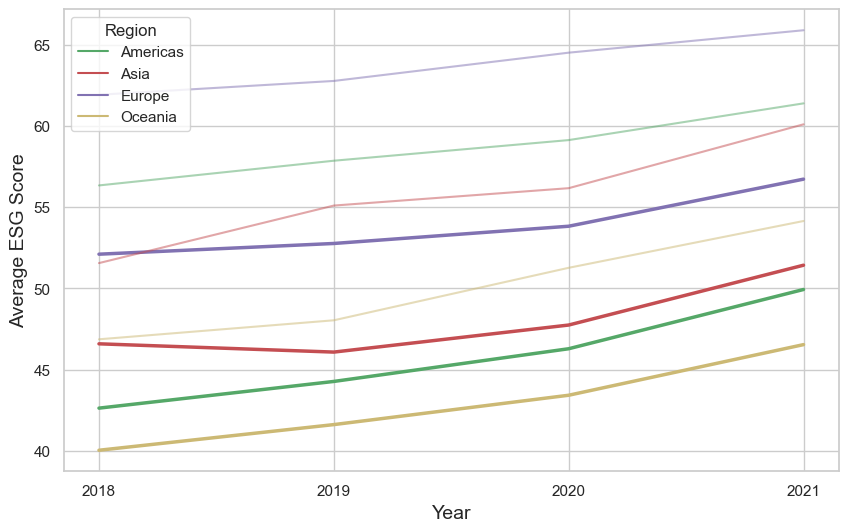

In [6]:
# Same but no Africa
df_ESG = df.groupby(['Year', 'Region of Headquarters']).mean().reset_index().iloc[76:96]
df_ESG = df_ESG[~df_ESG["Region of Headquarters"].str.contains("Africa")]

# Reference from Refinitiv
years = [2018, 2019, 2020, 2021]
regions = ["Americas", "Asia", "Europe", "Oceania"]
scores = [
    [56.33, 57.85, 59.12, 61.38],
    [51.55, 55.09, 56.16, 60.09],
    [61.91, 62.76, 64.5, 65.88],
    [46.86, 48.03, 51.26, 54.14]
]

df_list = [pd.DataFrame({
                "Year": years,
                "Region": region,
                "Average ESG Score": score})
            for region, score in zip(regions, scores)]

df_ESG_ref = pd.concat(df_list, ignore_index=True)

# Define custom color palette using colors from first plot
colors = ["#55a868", "#c44e52", "#8172b2", "#ccb974"]
light_colors = [(c[0], c[1], c[2], 0.5) for c in sns.color_palette(colors)]

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ESG, x="Year", y="ESG Score", hue="Region of Headquarters", palette=colors, linewidth=2.5)
sns.lineplot(data=df_ESG_ref, x="Year", y="Average ESG Score", hue="Region", palette=light_colors, legend=False)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average ESG Score", fontsize=14)
plt.xticks(np.arange(2018, 2022, 1))
plt.legend(title="Region", loc="upper left")
plt.show()